In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
#read the black friday data
df_train = pd.read_csv(r'C:\Users\Dimitrid\Desktop\Black_Friday_train.csv')

In [3]:
#shows the unique values for each column of the dataframe
for i in df_train.columns:
    print(i, ':', df_train[i].isnull().sum())

User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category_1 : 0
Product_Category_2 : 173638
Product_Category_3 : 383247
Purchase : 0


In [4]:
# Counts the purchases per gender    
df_train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [5]:
# Counts the values per age group
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [6]:
# Counts the purchases per city category
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

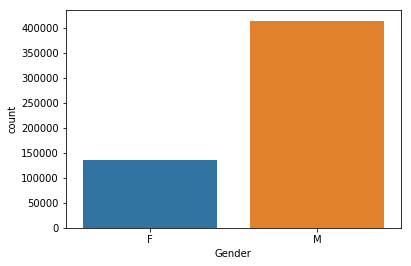

In [7]:
#plots the purchases per gender    
plt.figure()
gender_plot=sns.countplot(df_train['Gender'])
plt.show()

In [ ]:
# Plots the purchase by age group and splits it between gender
plt.figure()
sns.countplot(df_train['Age'], hue=df_train['Gender'])
plt.show()

In [ ]:
# drops the product category 3 since it has a lot of missing values and might skew the results
df_train = df_train.drop(['Product_Category_3'], axis=1)

In [ ]:
# fills the blanks or nans for the product category 2 based on ratio of existing values so we do not have to ommit so many data
df_train['Product_Category_2'].fillna(pd.Series(np.random.choice(['8','14','2','16','15','5','4'],p=[0.3,0.2,0.15,0.1,0.1,0.1,0.05],size=len(df_train))),inplace=True)

In [ ]:
df_train['Product_Category_2']=df_train['Product_Category_2'].astype(np.int64)

In [ ]:
# drops the columns since for this prediction User ID and product ID are not important to determine the amount purchased
df_train = df_train.drop(['User_ID','Product_ID'], axis=1)

In [ ]:
# vectorizes the categorical values of the dataframe in order to be used for the regression prediction
df_train['Gender']=df_train['Gender'].map({'F':1,'M':0})
df_train['Gender'].reset_index()

df_train['Age']=df_train['Age'].map({'0-17':0,'18-25':4,'26-35':6,'36-45':5,'46-50':3,'51-55':2,'55+':1})
df_train['Age'].reset_index()

df_train['City_Category']=df_train['City_Category'].map({'A':0,'B':2,'C':1})
df_train['City_Category'].reset_index()

df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})
df_train['Stay_In_Current_City_Years'].reset_index()

plt.figure()
sns.distplot(df_train['Purchase'])
plt.xlabel('Purchase Amount')
plt.title('Distribution of Purchase Amount')
plt.tight_layout()
plt.show()

df_train['Purchase'] = np.log(df_train['Purchase'])

plt.figure()
sns.distplot(df_train['Purchase'])
plt.xlabel('Purchase Amount')
plt.title('Distribution of Purchase Amount')
plt.tight_layout()
plt.show()

X=df_train.drop(columns=['Purchase','Product_Category_2'])

In [ ]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
regr=LinearRegression()

regr.fit(X_train,y_train)

regr.score(X,y)

predictions=regr.predict(X_test)

In [ ]:
mae=mean_absolute_error(y_test,predictions)
mse= mean_squared_error(y_test,predictions)
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))